In [29]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [30]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [31]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt
import pickle

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

import xarray as xr
from datetime import datetime
from salishsea_tools import grid_tools, viz_tools

from math import log10, floor


In [32]:
def make_nclist(start,end, var, tdir, verbose):
    
    rootdir = '/data/tjarniko/results/BASERUN_EXP/MAIN/'
    nc_array = []
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    
    
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)

    dayslen = len(arrow_array)
    
    for i in range(0,dayslen):
        tdate = arrow_array[i][0]
        ymd = tdate.format('YYYYMMDD')
        if verbose == True:
            print(ymd)

        ##SKOG_1d_20151127_20151231_ptrc_T_20151231-20151231.nc    
        t_nc = rootdir + tdir + '/ncs/' \
        '/SKOG_1d_*' + '_'+var+'_' +str(ymd) + '-' + str(ymd) + '.nc'
        t_ncname = glob.glob(t_nc)
        if verbose == True:
            print('file is: ' + t_ncname[0])
            print('')
        nc_array.append(t_ncname[0])
        
    return nc_array


In [33]:
tdir = 'PI_ACBC_2015_3'
verbose = False
#apr
start = '2015-04-01'
end = '2015-04-30'
var ='carp_T'
nc_C_PI_apr = make_nclist(start,end, var, tdir, verbose)
var = 'grid_T'
nc_TS_PI_apr = make_nclist(start,end, var, tdir, verbose)
#aug
start = '2015-08-01'
end = '2015-08-31'
var ='carp_T'
nc_C_PI_aug = make_nclist(start,end, var, tdir, verbose)
var = 'grid_T'
nc_TS_PI_aug = make_nclist(start,end, var, tdir, verbose)
#aug
start = '2015-12-01'
end = '2015-12-31'
var ='carp_T'
nc_C_PI_dec = make_nclist(start,end, var, tdir, verbose)
var = 'grid_T'
nc_TS_PI_dec = make_nclist(start,end, var, tdir, verbose)

In [34]:
tdir = 'BR_2nd_2015'
verbose = False
#apr
start = '2015-04-01'
end = '2015-04-30'
var ='carp_T'
nc_C_BR_apr = make_nclist(start,end, var, tdir, verbose)
var = 'grid_T'
nc_TS_BR_apr = make_nclist(start,end, var, tdir, verbose)
#aug
start = '2015-08-01'
end = '2015-08-31'
var ='carp_T'
nc_C_BR_aug = make_nclist(start,end, var, tdir, verbose)
var = 'grid_T'
nc_TS_BR_aug = make_nclist(start,end, var, tdir, verbose)
#aug
start = '2015-12-01'
end = '2015-12-31'
var ='carp_T'
nc_C_BR_dec = make_nclist(start,end, var, tdir, verbose)
var = 'grid_T'
nc_TS_BR_dec = make_nclist(start,end, var, tdir, verbose)

In [35]:
PI_DIC_apr = np.zeros([30,40,898,398])
PI_TA_apr = np.zeros([30,40,898,398])
PI_T_apr = np.zeros([30,40,898,398])
PI_S_apr = np.zeros([30,40,898,398])
#
BR_DIC_apr = np.zeros([30,40,898,398])
BR_TA_apr = np.zeros([30,40,898,398])
BR_T_apr = np.zeros([30,40,898,398])
BR_S_apr = np.zeros([30,40,898,398])
#
for i in range(0,len(nc_TS_PI_apr)):
    if (i%5 == 0):
        print(i)
    grid_PI = nc.Dataset(nc_TS_PI_apr[i])
    carp_PI = nc.Dataset(nc_C_PI_apr[i])
    grid_BR = nc.Dataset(nc_TS_BR_apr[i])
    carp_BR = nc.Dataset(nc_C_BR_apr[i])
    #carbon
    PI_DIC_apr[i,:,:,:]=carp_PI['dissolved_inorganic_carbon'][0,:,:,:]
    PI_TA_apr[i,:,:,:]=carp_PI['total_alkalinity'][0,:,:,:]
    BR_DIC_apr[i,:,:,:]=carp_BR['dissolved_inorganic_carbon'][0,:,:,:]
    BR_TA_apr[i,:,:,:]=carp_BR['total_alkalinity'][0,:,:,:]
    #TS
    PI_T_apr[i,:,:,:]=grid_PI['votemper'][0,:,:,:]
    PI_S_apr[i,:,:,:]=grid_PI['vosaline'][0,:,:,:]
    BR_T_apr[i,:,:,:]=grid_BR['votemper'][0,:,:,:]
    BR_S_apr[i,:,:,:]=grid_BR['vosaline'][0,:,:,:]

0
5
10
15
20
25


In [36]:
PI_DIC_aug = np.zeros([31,40,898,398])
PI_TA_aug = np.zeros([31,40,898,398])
PI_T_aug = np.zeros([31,40,898,398])
PI_S_aug = np.zeros([31,40,898,398])
#
BR_DIC_aug = np.zeros([31,40,898,398])
BR_TA_aug = np.zeros([31,40,898,398])
BR_T_aug = np.zeros([31,40,898,398])
BR_S_aug = np.zeros([31,40,898,398])
#
for i in range(0,len(nc_TS_PI_aug)):
    if (i%5 == 0):
        print(i)
    grid_PI = nc.Dataset(nc_TS_PI_aug[i])
    carp_PI = nc.Dataset(nc_C_PI_aug[i])
    grid_BR = nc.Dataset(nc_TS_BR_aug[i])
    carp_BR = nc.Dataset(nc_C_BR_aug[i])
    #carbon
    PI_DIC_aug[i,:,:,:]=carp_PI['dissolved_inorganic_carbon'][0,:,:,:]
    PI_TA_aug[i,:,:,:]=carp_PI['total_alkalinity'][0,:,:,:]
    BR_DIC_aug[i,:,:,:]=carp_BR['dissolved_inorganic_carbon'][0,:,:,:]
    BR_TA_aug[i,:,:,:]=carp_BR['total_alkalinity'][0,:,:,:]
    #TS
    PI_T_aug[i,:,:,:]=grid_PI['votemper'][0,:,:,:]
    PI_S_aug[i,:,:,:]=grid_PI['vosaline'][0,:,:,:]
    BR_T_aug[i,:,:,:]=grid_BR['votemper'][0,:,:,:]
    BR_S_aug[i,:,:,:]=grid_BR['vosaline'][0,:,:,:]

0
5
10
15
20
25
30


In [37]:
PI_DIC_dec = np.zeros([31,40,898,398])
PI_TA_dec = np.zeros([31,40,898,398])
PI_T_dec = np.zeros([31,40,898,398])
PI_S_dec = np.zeros([31,40,898,398])
#
BR_DIC_dec = np.zeros([31,40,898,398])
BR_TA_dec = np.zeros([31,40,898,398])
BR_T_dec = np.zeros([31,40,898,398])
BR_S_dec = np.zeros([31,40,898,398])
#
for i in range(0,len(nc_TS_PI_dec)):
    if (i%5 == 0):
        print(i)
    grid_PI = nc.Dataset(nc_TS_PI_dec[i])
    carp_PI = nc.Dataset(nc_C_PI_dec[i])
    grid_BR = nc.Dataset(nc_TS_BR_dec[i])
    carp_BR = nc.Dataset(nc_C_BR_dec[i])
    #carbon
    PI_DIC_dec[i,:,:,:]=carp_PI['dissolved_inorganic_carbon'][0,:,:,:]
    PI_TA_dec[i,:,:,:]=carp_PI['total_alkalinity'][0,:,:,:]
    BR_DIC_dec[i,:,:,:]=carp_BR['dissolved_inorganic_carbon'][0,:,:,:]
    BR_TA_dec[i,:,:,:]=carp_BR['total_alkalinity'][0,:,:,:]
    #TS
    PI_T_dec[i,:,:,:]=grid_PI['votemper'][0,:,:,:]
    PI_S_dec[i,:,:,:]=grid_PI['vosaline'][0,:,:,:]
    BR_T_dec[i,:,:,:]=grid_BR['votemper'][0,:,:,:]
    BR_S_dec[i,:,:,:]=grid_BR['vosaline'][0,:,:,:]

0
5
10
15
20
25
30


In [38]:
print('walrus')
PI_DIC_apr_mean = np.nanmean(PI_DIC_apr,axis=0)
print('walrus')
PI_TA_apr_mean = np.nanmean(PI_TA_apr,axis=0)
print('walrus')
PI_T_apr_mean = np.nanmean(PI_T_apr,axis=0)
print('walrus')
PI_S_apr_mean = np.nanmean(PI_S_apr,axis=0)
#
PI_DIC_aug_mean = np.nanmean(PI_DIC_aug,axis=0)
print('walrus')
PI_TA_aug_mean = np.nanmean(PI_TA_aug,axis=0)
print('walrus')
PI_T_aug_mean = np.nanmean(PI_T_aug,axis=0)
print('walrus')
PI_S_aug_mean = np.nanmean(PI_S_aug,axis=0)
print('walrus')
#
PI_DIC_dec_mean = np.nanmean(PI_DIC_dec,axis=0)
print('walrus')
PI_TA_dec_mean = np.nanmean(PI_TA_dec,axis=0)
print('walrus')
PI_T_dec_mean = np.nanmean(PI_T_dec,axis=0)
print('walrus')
PI_S_dec_mean = np.nanmean(PI_S_dec,axis=0)
print('walrus')

walrus
walrus
walrus
walrus
walrus
walrus
walrus
walrus
walrus
walrus
walrus
walrus


In [39]:
BR_DIC_apr_mean = np.nanmean(BR_DIC_apr,axis=0)
print('walrus')
BR_TA_apr_mean = np.nanmean(BR_TA_apr,axis=0)
print('walrus')
BR_T_apr_mean = np.nanmean(BR_T_apr,axis=0)
print('walrus')
BR_S_apr_mean = np.nanmean(BR_S_apr,axis=0)
#
BR_DIC_aug_mean = np.nanmean(BR_DIC_aug,axis=0)
print('walrus')
BR_TA_aug_mean = np.nanmean(BR_TA_aug,axis=0)
print('walrus')
BR_T_aug_mean = np.nanmean(BR_T_aug,axis=0)
print('walrus')
BR_S_aug_mean = np.nanmean(BR_S_aug,axis=0)
print('walrus')
#
BR_DIC_dec_mean = np.nanmean(BR_DIC_dec,axis=0)
print('walrus')
BR_TA_dec_mean = np.nanmean(BR_TA_dec,axis=0)
print('walrus')
BR_T_dec_mean = np.nanmean(BR_T_dec,axis=0)
print('walrus')
BR_S_dec_mean = np.nanmean(BR_S_dec,axis=0)
print('walrus')

walrus
walrus
walrus
walrus
walrus
walrus
walrus
walrus
walrus
walrus
walrus


In [40]:
print('walrus')
pickle.dump(PI_DIC_apr_mean, open("PI_DIC_apr_mean.pkl", 'wb'))
pickle.dump(PI_TA_apr_mean, open("PI_TA_apr_mean.pkl", 'wb'))
pickle.dump(PI_T_apr_mean, open("PI_T_apr_mean.pkl", 'wb'))
pickle.dump(PI_S_apr_mean, open("PI_S_apr_mean.pkl", 'wb'))
#
print('walrus')
pickle.dump(PI_DIC_aug_mean, open("PI_DIC_aug_mean.pkl", 'wb'))
pickle.dump(PI_TA_aug_mean, open("PI_TA_aug_mean.pkl", 'wb'))
pickle.dump(PI_T_aug_mean, open("PI_T_aug_mean.pkl", 'wb'))
pickle.dump(PI_S_aug_mean, open("PI_S_aug_mean.pkl", 'wb'))
#
print('walrus')
pickle.dump(PI_DIC_dec_mean, open("PI_DIC_dec_mean.pkl", 'wb'))
pickle.dump(PI_TA_dec_mean, open("PI_TA_dec_mean.pkl", 'wb'))
pickle.dump(PI_T_dec_mean, open("PI_T_dec_mean.pkl", 'wb'))
pickle.dump(PI_S_dec_mean, open("PI_S_dec_mean.pkl", 'wb'))


walrus
walrus
walrus


In [41]:
print('walrus')
pickle.dump(BR_DIC_apr_mean, open("BR_DIC_apr_mean.pkl", 'wb'))
pickle.dump(BR_TA_apr_mean, open("BR_TA_apr_mean.pkl", 'wb'))
pickle.dump(BR_T_apr_mean, open("BR_T_apr_mean.pkl", 'wb'))
pickle.dump(BR_S_apr_mean, open("BR_S_apr_mean.pkl", 'wb'))
#
print('walrus')
pickle.dump(BR_DIC_aug_mean, open("BR_DIC_aug_mean.pkl", 'wb'))
pickle.dump(BR_TA_aug_mean, open("BR_TA_aug_mean.pkl", 'wb'))
pickle.dump(BR_T_aug_mean, open("BR_T_aug_mean.pkl", 'wb'))
pickle.dump(BR_S_aug_mean, open("BR_S_aug_mean.pkl", 'wb'))
#
print('walrus')
pickle.dump(BR_DIC_dec_mean, open("BR_DIC_dec_mean.pkl", 'wb'))
pickle.dump(BR_TA_dec_mean, open("BR_TA_dec_mean.pkl", 'wb'))
pickle.dump(BR_T_dec_mean, open("BR_T_dec_mean.pkl", 'wb'))
pickle.dump(BR_S_dec_mean, open("BR_S_dec_mean.pkl", 'wb'))


walrus
walrus
walrus


In [42]:
def mocsy_3d_getOmA(tsal,ttemp,tdic,tta):
    tsra = np.ravel(tsal)
    ttera = np.ravel(ttemp)
    ttara = np.ravel(tta) * 1e-3
    tdra = np.ravel(tdic) * 1e-3
    tzero = np.zeros_like(tsra)
    tpressure = np.zeros_like(tsra)
    tpressure[:] =1
    tzero = tpressure * 0 

    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tzero, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup


    OmegaAR = OmegaA.reshape(40,898,398)
    return OmegaAR

In [43]:
#
f = open('PI_DIC_apr_mean.pkl', 'rb')
PI_DIC_apr_mean = pickle.load(f)   
print(np.shape(PI_DIC_apr_mean))

f = open('PI_TA_apr_mean.pkl', 'rb')
PI_TA_apr_mean = pickle.load(f)  
f = open('PI_T_apr_mean.pkl', 'rb')
PI_T_apr_mean = pickle.load(f)  
f = open('PI_S_apr_mean.pkl', 'rb')
PI_S_apr_mean = pickle.load(f)  
#
f = open('BR_DIC_apr_mean.pkl', 'rb')
BR_DIC_apr_mean = pickle.load(f)   
f = open('BR_TA_apr_mean.pkl', 'rb')
BR_TA_apr_mean = pickle.load(f)  
f = open('BR_T_apr_mean.pkl', 'rb')
BR_T_apr_mean = pickle.load(f)  
f = open('BR_S_apr_mean.pkl', 'rb')
BR_S_apr_mean = pickle.load(f)  
#
f = open('PI_DIC_aug_mean.pkl', 'rb')
PI_DIC_aug_mean = pickle.load(f)   
f = open('PI_TA_aug_mean.pkl', 'rb')
PI_TA_aug_mean = pickle.load(f)  
f = open('PI_T_aug_mean.pkl', 'rb')
PI_T_aug_mean = pickle.load(f)  
f = open('PI_S_aug_mean.pkl', 'rb')
PI_S_aug_mean = pickle.load(f)  
#
f = open('BR_DIC_aug_mean.pkl', 'rb')
BR_DIC_aug_mean = pickle.load(f)   
f = open('BR_TA_aug_mean.pkl', 'rb')
BR_TA_aug_mean = pickle.load(f)  
f = open('BR_T_aug_mean.pkl', 'rb')
BR_T_aug_mean = pickle.load(f)  
f = open('BR_S_aug_mean.pkl', 'rb')
BR_S_aug_mean = pickle.load(f) 
#
f = open('PI_DIC_dec_mean.pkl', 'rb')
PI_DIC_dec_mean = pickle.load(f)   
f = open('PI_TA_dec_mean.pkl', 'rb')
PI_TA_dec_mean = pickle.load(f)  
f = open('PI_T_dec_mean.pkl', 'rb')
PI_T_dec_mean = pickle.load(f)  
f = open('PI_S_dec_mean.pkl', 'rb')
PI_S_dec_mean = pickle.load(f)  
#
f = open('BR_DIC_dec_mean.pkl', 'rb')
BR_DIC_dec_mean = pickle.load(f)   
f = open('BR_TA_dec_mean.pkl', 'rb')
BR_TA_dec_mean = pickle.load(f)  
f = open('BR_T_dec_mean.pkl', 'rb')
BR_T_dec_mean = pickle.load(f)  
f = open('BR_S_dec_mean.pkl', 'rb')
BR_S_dec_mean = pickle.load(f) 

(40, 898, 398)


In [44]:
PI_OmA_apr_mean = mocsy_3d_getOmA(PI_S_apr_mean,PI_T_apr_mean,\
                                  PI_DIC_apr_mean,PI_TA_apr_mean)

BR_OmA_apr_mean = mocsy_3d_getOmA(BR_S_apr_mean,BR_T_apr_mean,\
                                  BR_DIC_apr_mean,BR_TA_apr_mean)
print('walrus')
PI_OmA_aug_mean = mocsy_3d_getOmA(PI_S_aug_mean,PI_T_aug_mean,\
                                  PI_DIC_aug_mean,PI_TA_aug_mean)
BR_OmA_aug_mean = mocsy_3d_getOmA(BR_S_aug_mean,BR_T_aug_mean,\
                                  BR_DIC_aug_mean,BR_TA_aug_mean)
PI_OmA_dec_mean = mocsy_3d_getOmA(PI_S_dec_mean,PI_T_dec_mean,\
                                  PI_DIC_dec_mean,PI_TA_dec_mean)
BR_OmA_dec_mean = mocsy_3d_getOmA(BR_S_dec_mean,BR_T_dec_mean,\
                                  BR_DIC_dec_mean,BR_TA_dec_mean)

walrus


In [45]:
pickle.dump(PI_OmA_apr_mean, open("PI_OmA_apr_mean.pkl", 'wb'))
pickle.dump(BR_OmA_apr_mean, open("BR_OmA_apr_mean.pkl", 'wb'))
pickle.dump(PI_OmA_aug_mean, open("PI_OmA_aug_mean.pkl", 'wb'))
pickle.dump(BR_OmA_aug_mean, open("BR_OmA_aug_mean.pkl", 'wb'))
pickle.dump(PI_OmA_dec_mean, open("PI_OmA_dec_mean.pkl", 'wb'))
pickle.dump(BR_OmA_dec_mean, open("BR_OmA_dec_mean.pkl", 'wb'))



In [46]:
f = open('PI_OmA_apr_mean.pkl', 'rb')
PI_OmA_apr_mean = pickle.load(f)   
f = open('BR_OmA_apr_mean.pkl', 'rb')
BR_OmA_apr_mean = pickle.load(f)  

f = open('PI_OmA_aug_mean.pkl', 'rb')
PI_OmA_aug_mean = pickle.load(f)  
f = open('BR_OmA_dec_mean.pkl', 'rb')
BR_OmA_aug_mean = pickle.load(f)  

f = open('PI_OmA_dec_mean.pkl', 'rb')
PI_OmA_dec_mean = pickle.load(f)
f = open('BR_OmA_dec_mean.pkl', 'rb')
BR_OmA_dec_mean = pickle.load(f)

f = open('BR_T_aug_mean.pkl', 'rb')
BR_T_aug_mean = pickle.load(f) 
t = BR_T_aug_mean

In [47]:
benthos_index = np.zeros([898,398])
for j in range(0,898):
    if j%50 == 0:
        print(j)
    for i in range(0,398):
        test = t[:,j,i]
        dat = np.where((test>0)&(test<1e19))
        W = not all(dat)

        if (W == False):#:np.isempty(dat):
            benthos = 1e20
        else:
            benthos = (np.max(dat))
        benthos_index[j,i] = (benthos)
    

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850


In [48]:
pickle.dump(benthos_index, open("benthos_index.pkl", 'wb'))

In [49]:
np.shape(benthos_index)

(898, 398)

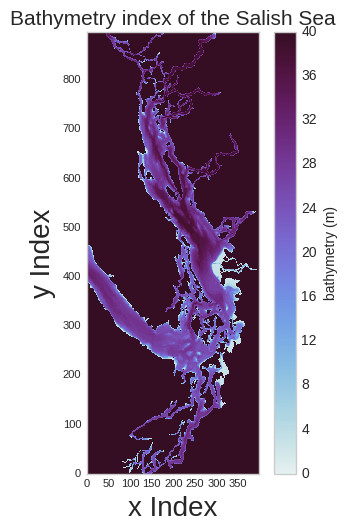

In [50]:
#bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
#bath1 = bath.variables['Bathymetry']

def plot_bathy(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 15 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
    ax.set_xlabel('x Index', fontsize = 20 )
    ax.set_ylabel('y Index', fontsize = 20 )

    plt.xlim([0,398])
    plt.ylim([0,898])
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    cmap.set_bad('lightslategray')
    plt.suptitle(bigtit,fontsize=20)
    cbar = plt.colorbar(mesh)
    cbar.set_label(clabel)

fact = 0.19

plot_bathy(benthos_index,'Bathymetry index of the Salish Sea', \
               cm.cm.dense,20*fact,30*fact,0,40,'bathymetry (m)','')

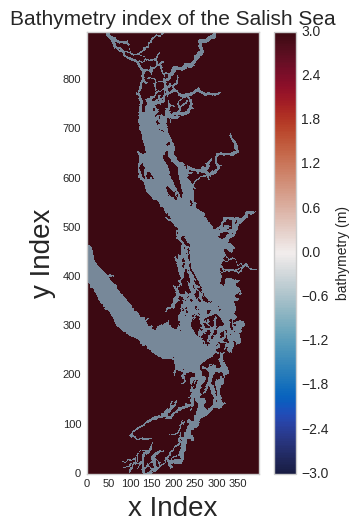

In [51]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
mbathys = np.array(mesh.mbathy[0])

#bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
#bath1 = bath.variables['Bathymetry']

def plot_bathy(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 15 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
    ax.set_xlabel('x Index', fontsize = 20 )
    ax.set_ylabel('y Index', fontsize = 20 )

    plt.xlim([0,398])
    plt.ylim([0,898])
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    cmap.set_bad('lightslategray')
    plt.suptitle(bigtit,fontsize=20)
    cbar = plt.colorbar(mesh)
    cbar.set_label(clabel)

fact = 0.19

plot_bathy(benthos_index-(mbathys-1),'Bathymetry index of the Salish Sea', \
               cm.cm.balance,20*fact,30*fact,-3,3,'bathymetry (m)','')

In [52]:
w = benthos_index-(mbathys-1)
w[250,250]

0.0

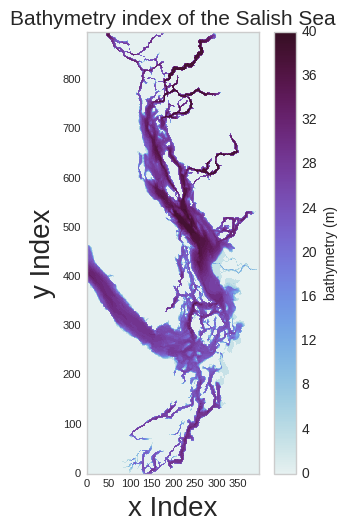

In [53]:
plot_bathy(mbathys-1,'Bathymetry index of the Salish Sea', \
               cm.cm.dense,20*fact,30*fact,0,40,'bathymetry (m)','')

In [54]:
f = open('PI_OmA_apr_mean.pkl', 'rb')
PI_OmA_apr_mean = pickle.load(f)   
f = open('BR_OmA_apr_mean.pkl', 'rb')
BR_OmA_apr_mean = pickle.load(f)  

f = open('PI_OmA_aug_mean.pkl', 'rb')
PI_OmA_aug_mean = pickle.load(f)  
f = open('BR_OmA_dec_mean.pkl', 'rb')
BR_OmA_aug_mean = pickle.load(f)  

f = open('PI_OmA_dec_mean.pkl', 'rb')
PI_OmA_dec_mean = pickle.load(f)
f = open('BR_OmA_dec_mean.pkl', 'rb')
BR_OmA_dec_mean = pickle.load(f)

f = open('BR_T_aug_mean.pkl', 'rb')
BR_T_aug_mean = pickle.load(f) 
t = BR_T_aug_mean

benthos_index = np.zeros([898,398])
for j in range(0,898):
    if j%50 == 0:
        print(j)
    for i in range(0,398):
        test = t[:,j,i]
        dat = np.where((test>0)&(test<1e19))
        W = not all(dat)

        if (W == False):#:np.isempty(dat):
            benthos = 1e20
        else:
            benthos = (np.max(dat))
        benthos_index[j,i] = (benthos)

print(PI_OmA_apr_mean[0,0,0])
PI_OmA_apr_benthos = np.zeros([898,398])
BR_OmA_apr_benthos = np.zeros([898,398])
PI_OmA_aug_benthos = np.zeros([898,398])
BR_OmA_aug_benthos = np.zeros([898,398])
PI_OmA_dec_benthos = np.zeros([898,398])
BR_OmA_dec_benthos = np.zeros([898,398])

for j in range(0,898):
    if j%50 == 0:
        print(j)
    for i in range(0,398):
        benth = int(benthos_index[j,i])
        if benth > 1e10:
            PI_OmA_apr_benthos[j,i] = 1e20
            BR_OmA_apr_benthos[j,i] = 1e20
            PI_OmA_aug_benthos[j,i] = 1e20
            BR_OmA_aug_benthos[j,i] = 1e20
            PI_OmA_dec_benthos[j,i] = 1e20
            BR_OmA_dec_benthos[j,i] = 1e20      
        else:   
            PI_OmA_apr_benthos[j,i] = PI_OmA_apr_mean[benth,j,i]
            BR_OmA_apr_benthos[j,i] = BR_OmA_apr_mean[benth,j,i]
            PI_OmA_aug_benthos[j,i] = PI_OmA_aug_mean[benth,j,i]
            BR_OmA_aug_benthos[j,i] = BR_OmA_aug_mean[benth,j,i]
            PI_OmA_dec_benthos[j,i] = PI_OmA_dec_mean[benth,j,i]
            BR_OmA_dec_benthos[j,i] = BR_OmA_dec_mean[benth,j,i]

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
1e+20
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850


In [55]:
mbathys_cor = mbathys-1
mbathys_cor[250,250]

27

In [56]:
f = open('PI_OmA_apr_mean.pkl', 'rb')
PI_OmA_apr_mean = pickle.load(f)   
f = open('BR_OmA_apr_mean.pkl', 'rb')
BR_OmA_apr_mean = pickle.load(f)  

f = open('PI_OmA_aug_mean.pkl', 'rb')
PI_OmA_aug_mean = pickle.load(f)  
f = open('BR_OmA_dec_mean.pkl', 'rb')
BR_OmA_aug_mean = pickle.load(f)  

f = open('PI_OmA_dec_mean.pkl', 'rb')
PI_OmA_dec_mean = pickle.load(f)
f = open('BR_OmA_dec_mean.pkl', 'rb')
BR_OmA_dec_mean = pickle.load(f)

PI_OmA_apr_benthos = np.zeros([898,398])
BR_OmA_apr_benthos = np.zeros([898,398])
PI_OmA_aug_benthos = np.zeros([898,398])
BR_OmA_aug_benthos = np.zeros([898,398])
PI_OmA_dec_benthos = np.zeros([898,398])
BR_OmA_dec_benthos = np.zeros([898,398])

mbathys_cor = mbathys-1
for j in range(0,898):
    if j%50 == 0:
        print(j)
    for i in range(0,398):
        benth = int(mbathys_cor[j,i])
        if benth < 0:
            PI_OmA_apr_benthos[j,i] = 1e20
            BR_OmA_apr_benthos[j,i] = 1e20
            PI_OmA_aug_benthos[j,i] = 1e20
            BR_OmA_aug_benthos[j,i] = 1e20
            PI_OmA_dec_benthos[j,i] = 1e20
            BR_OmA_dec_benthos[j,i] = 1e20      
        else:   
            PI_OmA_apr_benthos[j,i] = PI_OmA_apr_mean[benth,j,i]
            BR_OmA_apr_benthos[j,i] = BR_OmA_apr_mean[benth,j,i]
            PI_OmA_aug_benthos[j,i] = PI_OmA_aug_mean[benth,j,i]
            BR_OmA_aug_benthos[j,i] = BR_OmA_aug_mean[benth,j,i]
            PI_OmA_dec_benthos[j,i] = PI_OmA_dec_mean[benth,j,i]
            BR_OmA_dec_benthos[j,i] = BR_OmA_dec_mean[benth,j,i]

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850


In [57]:
pickle.dump(PI_OmA_apr_benthos, open("PI_OmA_apr_benthos_mbath.pkl", 'wb'))
pickle.dump(BR_OmA_apr_benthos, open("BR_OmA_apr_benthos_mbath.pkl", 'wb'))
pickle.dump(PI_OmA_aug_benthos, open("PI_OmA_aug_benthos_mbath.pkl", 'wb'))
pickle.dump(BR_OmA_aug_benthos, open("BR_OmA_aug_benthos_mbath.pkl", 'wb'))
pickle.dump(PI_OmA_dec_benthos, open("PI_OmA_dec_benthos_mbath.pkl", 'wb'))
pickle.dump(BR_OmA_dec_benthos, open("BR_OmA_dec_benthos_mbath.pkl", 'wb'))


In [58]:
import pickle
f = open('BR_OmA_aug_mean.pkl', 'rb')
BR_OmA_aug_mean = pickle.load(f) 
f = open('BR_OmA_dec_mean.pkl', 'rb')
BR_OmA_dec_mean = pickle.load(f) 

In [59]:
BR_OmA_aug_mean[27,250:255,250:255]

array([[8.76939926e-01, 8.81809405e-01, 1.00000000e+20, 1.00000000e+20,
        1.00000000e+20],
       [8.76674119e-01, 8.82068040e-01, 1.00000000e+20, 1.00000000e+20,
        1.00000000e+20],
       [8.75878003e-01, 8.81687125e-01, 1.00000000e+20, 1.00000000e+20,
        1.00000000e+20],
       [8.76003721e-01, 8.80644070e-01, 1.00000000e+20, 1.00000000e+20,
        1.00000000e+20],
       [8.76924639e-01, 8.80788023e-01, 1.00000000e+20, 1.00000000e+20,
        1.00000000e+20]])

In [60]:
BR_OmA_dec_mean[27,250:255,250:255]

array([[1.05710249e+00, 1.05830494e+00, 1.00000000e+20, 1.00000000e+20,
        1.00000000e+20],
       [1.05689042e+00, 1.05766790e+00, 1.00000000e+20, 1.00000000e+20,
        1.00000000e+20],
       [1.05653955e+00, 1.05680491e+00, 1.00000000e+20, 1.00000000e+20,
        1.00000000e+20],
       [1.05466577e+00, 1.05511824e+00, 1.00000000e+20, 1.00000000e+20,
        1.00000000e+20],
       [1.05377080e+00, 1.05379679e+00, 1.00000000e+20, 1.00000000e+20,
        1.00000000e+20]])

In [61]:
f = open('BR_OmA_aug_benthos_mbath.pkl', 'rb')
BR_OmA_aug_benthos_mbath = pickle.load(f) 
f = open('BR_OmA_dec_benthos_mbath.pkl', 'rb')
BR_OmA_dec_benthos_mbath = pickle.load(f)

In [62]:
BR_OmA_aug_benthos_mbath[250:255,250:255]

array([[1.05710249, 1.05830494, 1.06195089, 1.06572591, 1.06769118],
       [1.05689042, 1.0576679 , 1.06006089, 1.06388912, 1.07807263],
       [1.05653955, 1.05680491, 1.05836165, 1.06072398, 1.07463373],
       [1.05466577, 1.05511824, 1.057342  , 1.05665142, 1.06205454],
       [1.0537708 , 1.05379679, 1.05702346, 1.05687216, 1.05645374]])

In [63]:
BR_OmA_dec_benthos_mbath[250:255,250:255]

array([[1.05710249, 1.05830494, 1.06195089, 1.06572591, 1.06769118],
       [1.05689042, 1.0576679 , 1.06006089, 1.06388912, 1.07807263],
       [1.05653955, 1.05680491, 1.05836165, 1.06072398, 1.07463373],
       [1.05466577, 1.05511824, 1.057342  , 1.05665142, 1.06205454],
       [1.0537708 , 1.05379679, 1.05702346, 1.05687216, 1.05645374]])